## Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

## Import Salary csv file

In [45]:
df = pd.read_csv('Resources/Kaggle Data/Levels_Fyi_Salary_Data.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [46]:
# Build Year column from timestamp
df['yearposted'] = pd.DatetimeIndex(df['timestamp']).year
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,yearposted
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,NaN,NaN,2017
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,NaN,NaN,2017
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,NaN,NaN,2017
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,NaN,NaN,2017
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,NaN,NaN,2017


In [25]:
# Remove columns that are not beneficiary 
LR_df = df.drop(['timestamp','company', 'level','title','location','yearsatcompany','tag', 'basesalary','stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
'rowNumber','Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College','Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic','Race','Education' ], axis = 1)
LR_df.head()

,totalyearlycompensation,yearsofexperience,yearposted
0,127000,1.5,2017
1,100000,5.0,2017
2,310000,8.0,2017
3,372000,7.0,2017
4,157000,5.0,2017


In [26]:
# Look at the values in the columns
LR_df.dtypes

totalyearlycompensation      int64
yearsofexperience          float64
yearposted                   int64
dtype: object

In [28]:
LR_df = LR_df.dropna()

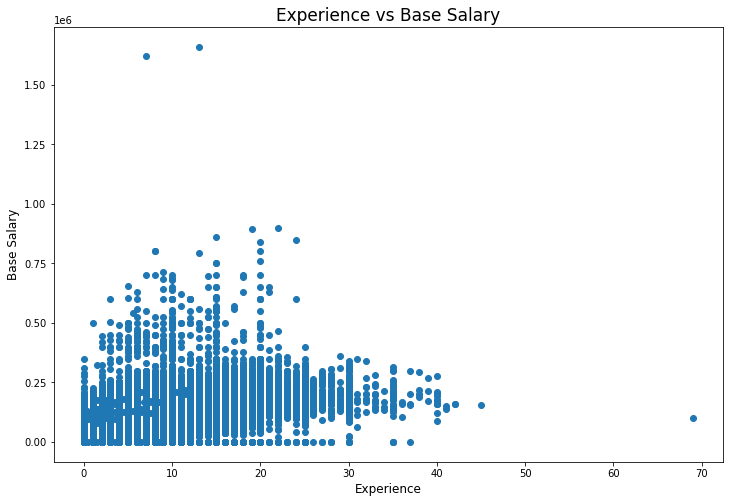

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(df.yearsofexperience, df.basesalary)
plt.title("Experience vs Base Salary", size=17)
plt.xlabel("Experience", size=12)
plt.ylabel("Base Salary", size=12)
plt.show()

## Building Linear Regression 
- Target Variable: Total Yearly Compensation
- Features: Years of Experience

In [31]:
X = LR_df.yearsofexperience.values.reshape(-1, 1)
X.shape

(62642, 1)

In [32]:
y = df.totalyearlycompensation

In [33]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [34]:
y_pred = model.predict(X)
print(y_pred.shape)

(62642,)


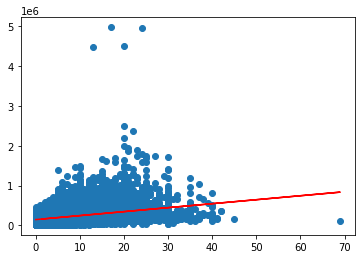

In [35]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [36]:
print(model.coef_)
print(model.intercept_)

[9994.49319576]
144298.6945578495


## Building Random Forest Model

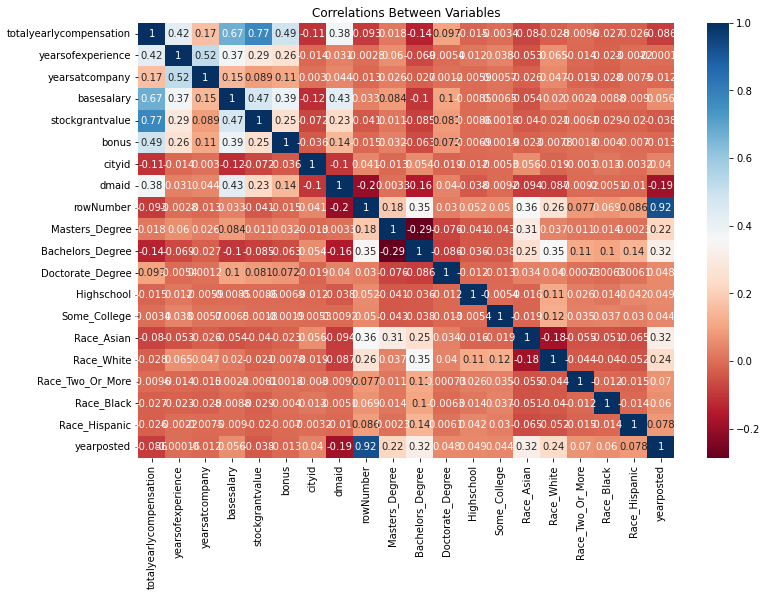

In [37]:
# Look at correlation between total compensation and other variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="RdBu", annot = True)
plt.title("Correlations Between Variables")
plt.show()

### Prepare the data

In [47]:
# Remove columns and rows holding missing values
df.isna().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
yearposted                     0
dtype: int

In [48]:
df = df.dropna()
df.isna().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
yearposted                 0
dtype: int64

### Split the data into independent and target variables

In [49]:
# From the heatmap above we see that years of experience, Stock grant value, base salary and bonus have the highest
#Remove columns that are not beneficiary to the model
RF_df = df.drop(['timestamp','yearposted','title','yearsatcompany','tag','gender', 'otherdetails', 'cityid', 'dmaid','rowNumber','Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College','Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic','Race','Education' ], axis = 1)
RF_df.head()

,company,level,totalyearlycompensation,location,yearsofexperience,basesalary,stockgrantvalue,bonus
15710,Google,L6,400000,"Sunnyvale, CA",5.0,210000.0,145000.0,45000.0
23532,Microsoft,61,136000,"Redmond, WA",3.0,124000.0,1000.0,11000.0
23533,Google,L5,337000,"San Bruno, CA",6.0,177000.0,125000.0,36000.0
23534,Microsoft,62,222000,"Seattle, WA",4.0,164000.0,38000.0,20000.0
23535,Blend,IC3,187000,"San Francisco, CA",5.0,165000.0,22000.0,0.0


In [53]:
# Create our features
X = pd.get_dummies(RF_df.drop(columns='totalyearlycompensation'))

# Create our target
y = RF_df['totalyearlycompensation']

In [54]:
X.describe()

,yearsofexperience,basesalary,stockgrantvalue,bonus,company_10x Genomics,company_23andMe,company_2U,company_3M,company_8x8,company_ABB,...,"location_Worcester, MA","location_Wroclaw, DS, Poland","location_Yavne, JM, Israel","location_Yerevan, ER, Armenia","location_York, PA","location_Yorktown Heights, NY","location_Yulee, FL","location_Zapopan, JA, Mexico","location_Zurich, ZH, Switzerland","location_hod hasharon, HM, Israel"
count,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,...,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000
mean,7.126899,133897.077273,44969.985270,18399.749082,0.000093,0.000046,0.000232,0.000372,0.000139,0.000325,...,0.000046,0.000139,0.000139,0.000046,0.000093,0.000139,0.000046,0.000046,0.002509,0.000046
std,5.849500,57229.207611,72517.216239,24800.958541,0.009640,0.006817,0.015241,0.019277,0.011806,0.018033,...,0.006817,0.011806,0.011806,0.006817,0.009640,0.011806,0.006817,0.006817,0.050030,0.006817
min,0.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,100000.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,135000.000000,20000.000000,13000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,165000.000000,55000.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.000000,900000.000000,954000.000000,900000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
#Splitting the data into train,test data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape

(17216, 3617)

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [64]:
print(round(rf_regressor.score(X_test,y_test)*100))
print(round(expl_rf)*100)

80
100
